In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/My Drive/household_power_consumption/household_power_consumption.txt", sep = ';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'],na_values = '?', dtype = float)

In [ ]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
data.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
data.isnull().values.any()

True

In [ ]:
data_copy = data.copy()

In [ ]:
data_copy.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
data_copy_f = data_copy.fillna(data_copy.mean())
data_copy_b = data_copy.fillna(method = 'bfill')
data_copy_lif = data_copy.interpolate(method = 'linear', limit_direction= 'forward')
data_copy_lib = data_copy.interpolate(method = 'linear', limit_direction= 'backward')


In [ ]:
data_copy_f

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data_daily.Global_active_power, data_daily.Global_reactive_power)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.041


In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data_daily.Voltage, data_daily.Global_intensity)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.052


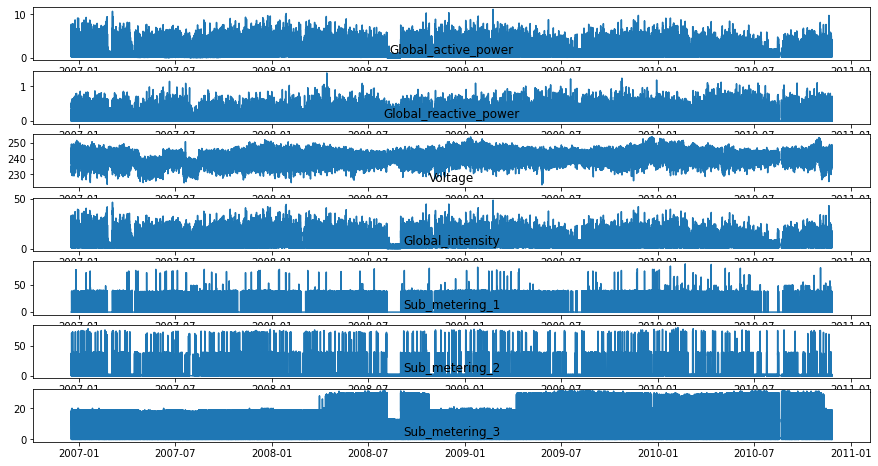

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [ ]:
for i in range(len(data_copy_f.columns)):
    plt.subplot(len(data_copy_f.columns), 1, i+1)
    name = data_copy_f.columns[i]
    plt.plot(data_copy_f[name])
    plt.title(name, y=0)
plt.show()
plt.figure(figsize=(20,20))

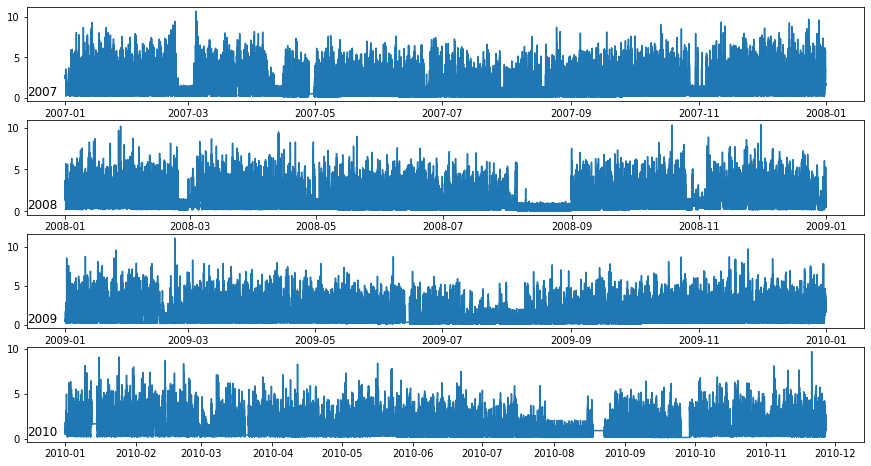

In [ ]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
plt.figure()
for i in range(len(years)):
# prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
# determine the year to plot
    year = years[i]

# get all observations for the year
    result = data_copy_f[str(year)]
# plot the active power for the year
    plt.plot(result['Global_active_power'])
# add a title to the subplot
    plt.title(str(year), y=0, loc='left')
plt.show()

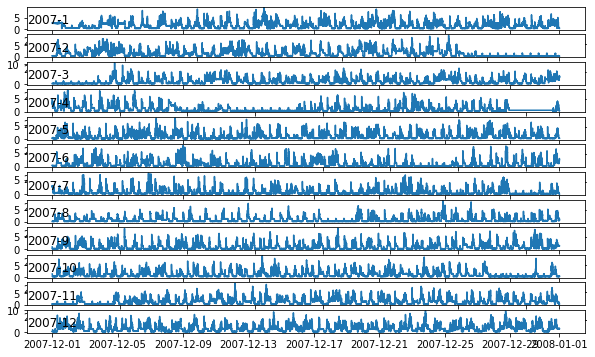

<Figure size 1080x576 with 0 Axes>

In [ ]:
# plot active power for each year
months = [x for x in range(1, 13)]
plt.figure(figsize=(10,6))
for i in range(len(months)):
# prepare subplot
    ax = plt.subplot(len(months), 1, i+1)
# determine the month to plot
    month = '2007-' + str(months[i])
# get all observations for the month
    result = data_copy_f [month]
# plot the active power for the month
    plt.plot(result['Global_active_power'])
# add a title to the subplot
    plt.title(month, y=0, loc='left')
plt.show()

plt.tight_layout()

In [ ]:
data_copy_f.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
data_copy_f.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='datetime', length=2075259, freq=None)

In [ ]:
data_monthly = data_copy_f.resample('M').mean()
data_daily= data_copy_f.resample('D').sum()

In [ ]:
data_daily.shape

(1442, 7)

Text(0, 0.5, 'passengers')

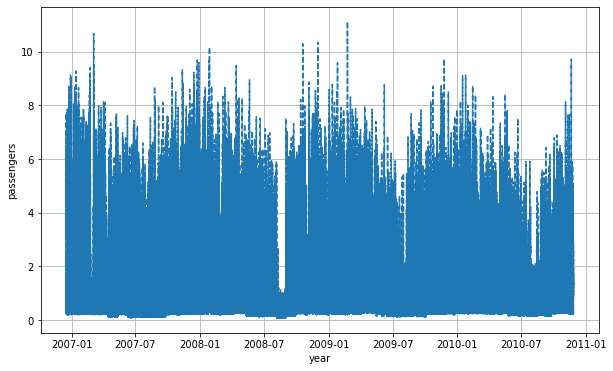

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(data_copy_f.index, data_copy_f.Global_active_power, '--',)
plt.grid()
plt.xlabel('year')
plt.ylabel('passengers')

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(data_daily):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

In [ ]:
train = data_daily[:1077]
test = data_daily[1077:]

In [ ]:
test.shape

(365, 7)

In [ ]:
df_ma =data_copy_f.copy()
ma = df_ma['Global_active_power'].rolling(12).mean()

Text(0, 0.5, 'passengers')

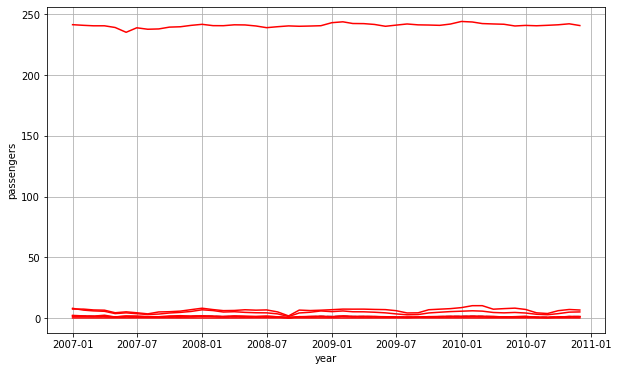

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(data_monthly.index, data_monthly.Global_active_power, '--',)
plt.plot(data_monthly, 'red')
plt.grid()
plt.xlabel('year')
plt.ylabel('passengers')

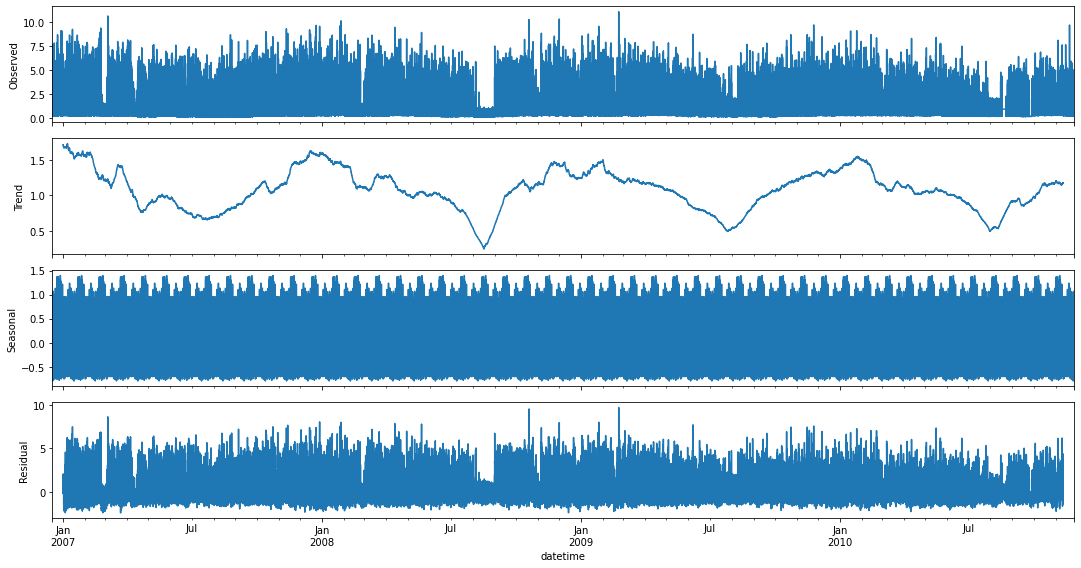

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(data_copy_f['Global_active_power'], model = 'additive', freq= (60*24*30))
decompose_series.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data_daily['Voltage'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')


ADF Statistic: -3.732876443909862
p-value: 0.0036737767768042604
No. of lags used: 21
No. of observations used : 1420
Critical Values:
   1%: -3.4349634933241084
   5%: -2.8635775363009244
   10%: -2.5678547733584605


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data_daily['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')


ADF Statistic: -3.734758680846034
p-value: 0.0036499731073695095
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384


In [ ]:
#from the results above, the p-value is greater than the critical value at a 5% #significance level and, the adf statistics is greater than any of the critical values obtained. # this confirms that the series is indeed non-stationary. 

In [ ]:
data_log = np.log(data_daily)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



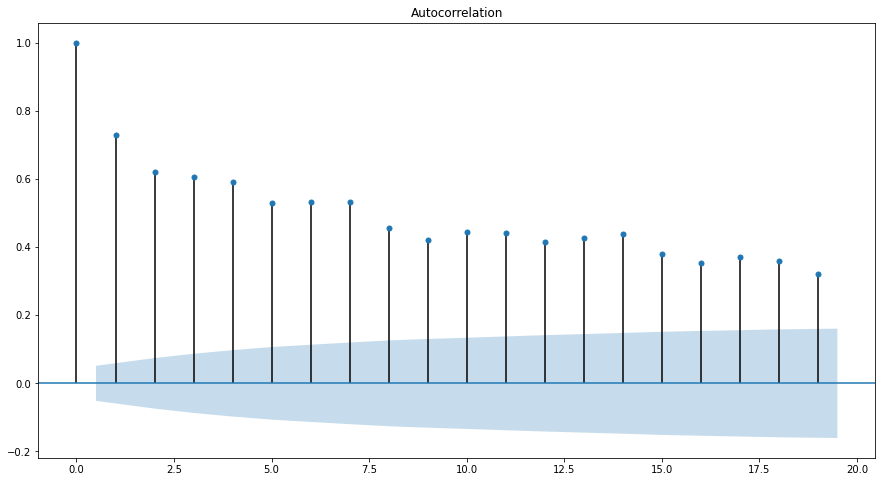

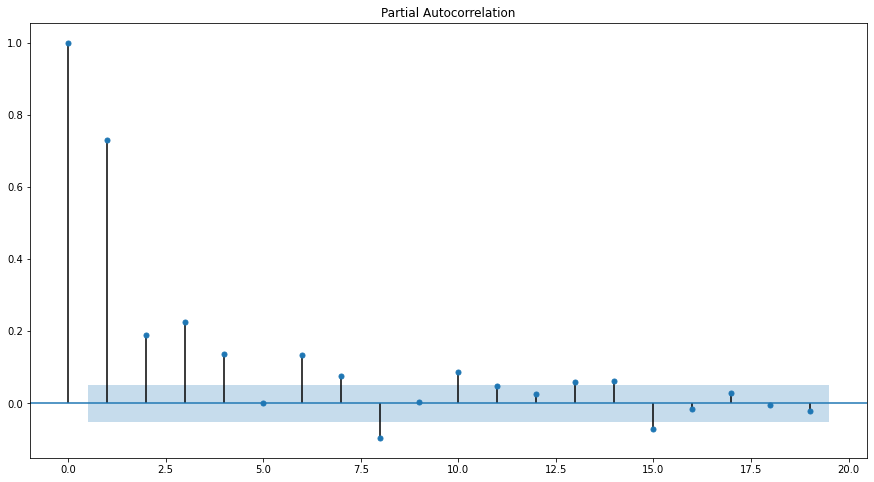

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#acf
plot_acf(data_log.Global_active_power, lags = range(0, 20))
plt.show()
#pacf
plot_pacf(data_log.Global_active_power, lags = range(0, 20))
plt.show()

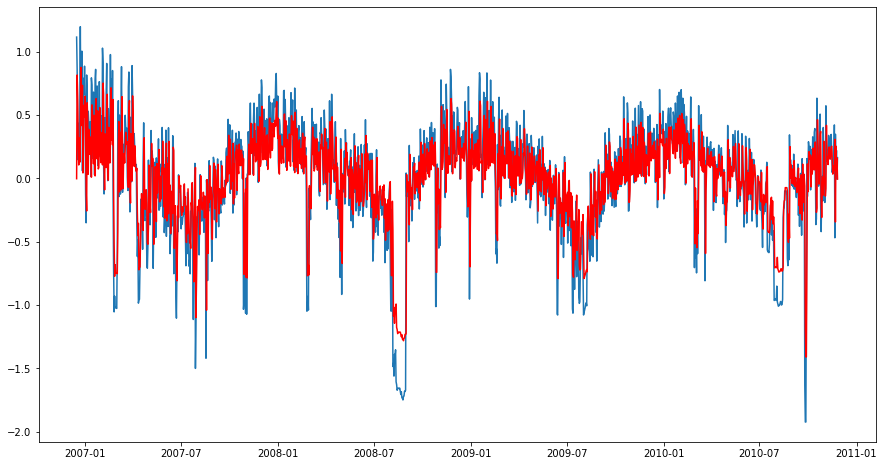

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
AR_model = ARIMA(data_log.Global_active_power, order = (1,0,0))
AR_model_results = AR_model.fit()
plt.plot(data_log.Global_active_power)
plt.plot(AR_model_results.fittedvalues, color= 'red')

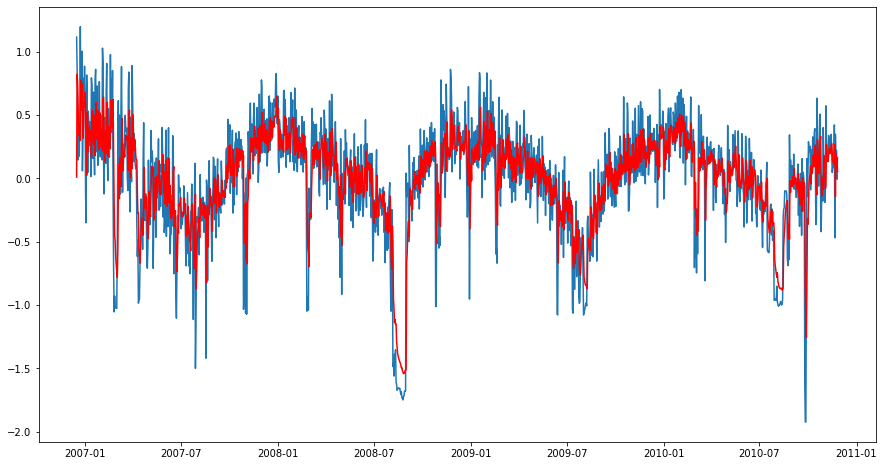

In [ ]:
ma_model = ARIMA(data_log.Global_active_power, order = (2,0,1))
ma_model_results = ma_model.fit()
plt.plot(data_log.Global_active_power)
plt.plot(ma_model_results.fittedvalues, color = 'red')

In [ ]:
ARIMA_model = ARIMA(data_diff, order = (2,0,1))
ARIMA_results = ARIMA_model.fit()
plt.plot(data_diff)
plt.plot(ARIMA_results.fittedvalues, color = 'red')

NameError: ignored

In [ ]:
from fbprophet import Prophet
data_daily2 = train.reset_index()
data_daily2 = data_daily2[['datetime','Global_active_power']]
data_daily2.shape 


(1077, 2)

In [ ]:
new_df = data_daily2.rename(columns={"datetime": "ds", "Global_active_power": "y"})
new_df.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [ ]:
data_daily3 = test.reset_index()
data_daily3 = data_daily3[['datetime','Global_active_power']]
data_daily3.shape 

(365, 2)

In [ ]:
new_df1 = data_daily3.rename(columns={"datetime": "ds", "Global_active_power": "y"})
new_df1.head()

,ds,y
0,2009-11-27,1380.026
1,2009-11-28,1858.950
2,2009-11-29,1650.962
3,2009-11-30,1745.190
4,2009-12-01,1756.378


In [ ]:
model = Prophet()
model.fit(new_df)
 #future = model.make_future_dataframe(periods=12, freq='D') 
forecast = model.predict(new_df1.drop('y', axis = 1)) 
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2009-11-27,2101.481147,1540.839425,2694.738138,1582.602983,1582.602983,1582.602983
1,2009-11-28,2404.822494,1851.688618,2989.702811,1582.737295,1582.737295,1582.737295
2,2009-11-29,2379.004539,1860.396538,2942.485036,1582.871607,1582.871607,1582.871607
3,2009-11-30,1979.262602,1444.033936,2507.888658,1583.005919,1583.005919,1583.005919
4,2009-12-01,2100.244401,1567.549453,2668.889254,1583.140231,1583.140231,1583.140231
...,...,...,...,...,...,...,...
360,2010-11-22,2038.931308,1476.038861,2552.574949,1630.955318,1618.438362,1643.676795
361,2010-11-23,2181.103668,1663.194803,2739.357164,1631.089630,1618.534949,1643.871573
362,2010-11-24,2192.185077,1628.156193,2771.244882,1631.223942,1618.632490,1644.066351
363,2010-11-25,2024.913261,1496.462776,2589.127959,1631.358254,1618.722925,1644.261129


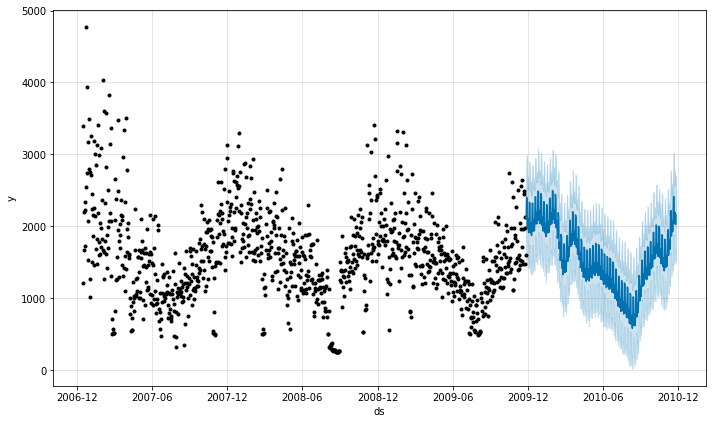

In [ ]:
model.plot(forecast)
plt.show()       

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
sklearn.metrics.mean_absolute_error(new_df1.y, forecast.yhat)

ImportError: ignored

In [ ]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(new_df1.y, forecast.yhat)

20.884985090046293

In [ ]:
mse = sklearn.metrics.mean_squared_error(new_df1.y, forecast.yhat)

rmse = np.sqrt(mse)

print(rmse)

374.95339269907197
